<a href="https://colab.research.google.com/github/Tobsam237/Take_Home_Challenge/blob/main/TakeHomeChallenge_Oluwatoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1: Exploratory Data Analysis**

**To do:**
****
 Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [ ]:
#Import necessary packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#data = files.upload()

Saving logins.json to logins.json
Saving ultimate_data_challenge.json to ultimate_data_challenge.json


In [ ]:
df1 = pd.read_json('logins.json')
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


**Data Wrangling and EDA**

In [ ]:
print(df1.shape)
print(df1.dtypes)

(93142, 1)
login_time    datetime64[ns]
dtype: object


In [ ]:
#check for null values
df1.isna().sum()

login_time    0
dtype: int64

In [ ]:
#Aggregate/resample these login counts in 15minute
df = df1.resample('15T', on='login_time').count()
df = df.rename(columns={'login_time': 'login_counts'})

In [ ]:
df.shape

(9788, 1)

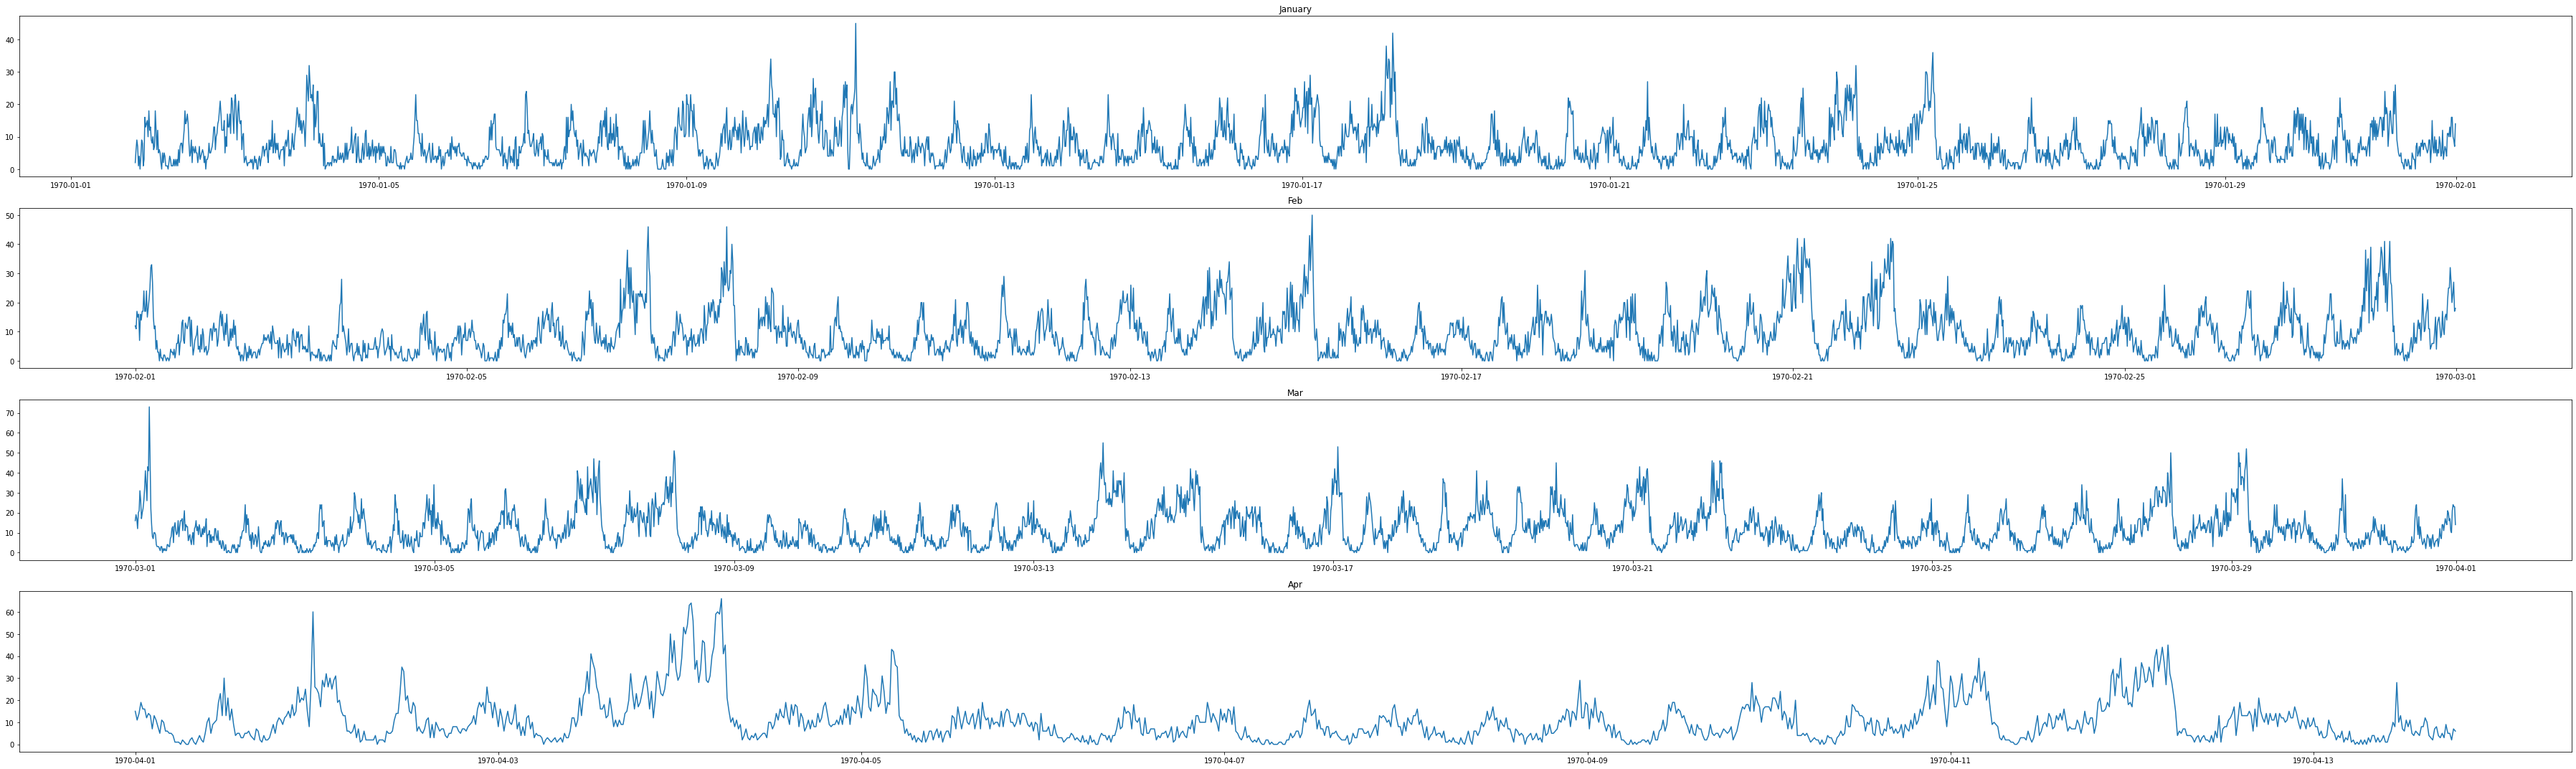

In [ ]:
#Lets see the 15minute timeplot for each month

fig, axs = plt.subplots(4, figsize=(50,15))
#plt.figure(figsize=(50,5))

axs[0].set_title('January')
axs[0].plot(df.loc['1970-01'])

axs[1].set_title('Feb')
axs[1].plot(df.loc['1970-02'])

axs[2].set_title('Mar')
axs[2].plot(df.loc['1970-03'])

axs[3].set_title('Apr')
axs[3].plot(df.loc['1970-04'])

plt.tight_layout()

* Observe some revealing patterns between jan, feb and mar esp
* Also, observe April data seems incomplete


Lets build a daily and day_of_week data to better understand the patterns

In [ ]:
df['login_hour'] = df.index.to_series().dt.hour
df['login_dayofweek'] = df.index.to_series().dt.day_name()
df['login_date'] = df.index.to_series().dt.date

df.head()

,login_counts,login_hour,login_dayofweek,login_date
login_time,,,,
1970-01-01 20:00:00,2,20,Thursday,1970-01-01
1970-01-01 20:15:00,6,20,Thursday,1970-01-01
1970-01-01 20:30:00,9,20,Thursday,1970-01-01
1970-01-01 20:45:00,7,20,Thursday,1970-01-01
1970-01-01 21:00:00,1,21,Thursday,1970-01-01


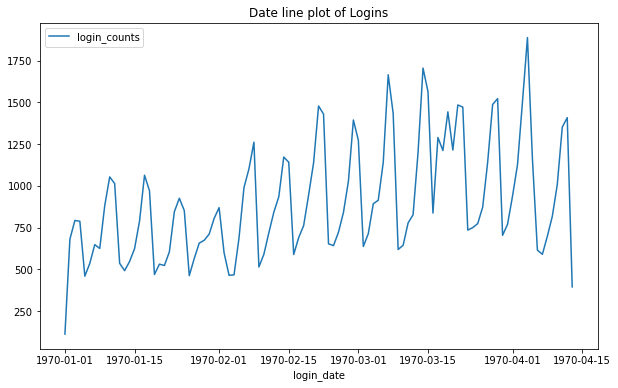

In [ ]:
df_date = df[['login_counts','login_date']].groupby('login_date').sum()

plt.figure(figsize=(10,6))
sns.lineplot(data = df_date)
plt.title('Date line plot of Logins')
plt.show()

* Observe a steady increase in ridership acorss
* Note that there seems to be a clear pattern in logins with obvious steady peaks and dips


What does the daily pattern look like?
what daysofweek have the most?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

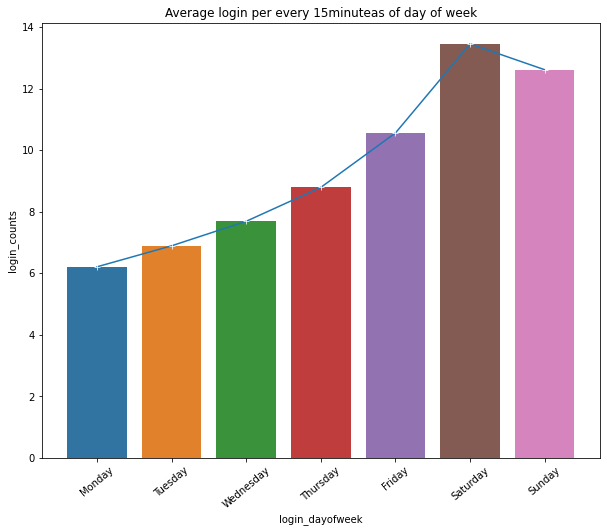

In [ ]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_dayofweek = df[['login_counts', 'login_dayofweek']].groupby('login_dayofweek').mean().reindex(cats)

#df_dayofweek.plot(kind='bar', figsize=(10,6))
#plt.title('day of week counts of logins')
#plt.plot(data=df_dayofweek)
#plt.show()

fig, ax = plt.subplots(figsize=(10,8))

plt.title('Average login per every 15minuteas of day of week')
sns.barplot(data=df_dayofweek, x=df_dayofweek.index, y=df_dayofweek.login_counts)
sns.lineplot(data=df_dayofweek, x=df_dayofweek.index, y=df_dayofweek.login_counts, marker='+')
plt.xticks(rotation=40)


* Observe weekends have the most average logins days
* With mondays being the least


Can we tell what time by of day is busiest/

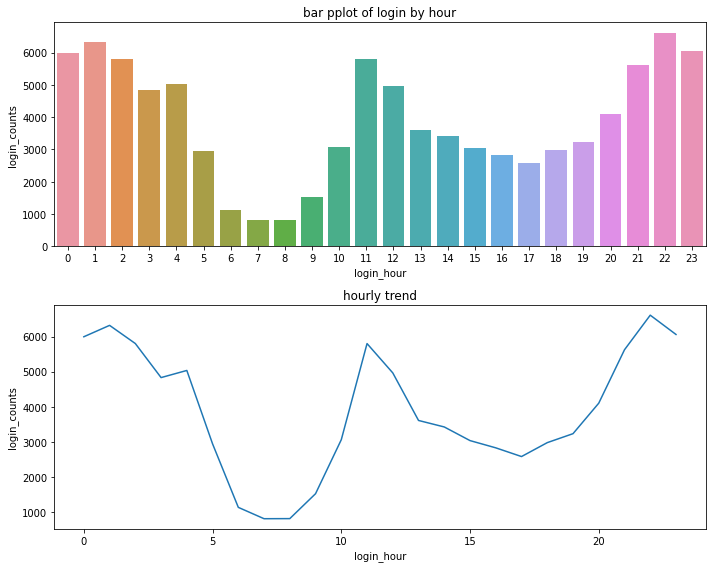

In [ ]:
df_hour = df.groupby('login_hour').sum()

fig, axs = plt.subplots(2, figsize=(10,8))

axs[0].set_title('bar pplot of login by hour')
sns.barplot(x=df_hour.index, y=df_hour.login_counts, ax=axs[0])

axs[1].set_title('hourly trend')
sns.lineplot(x=df_hour.index, y=df_hour.login_counts)

plt.tight_layout()

Logins seems to be rougly sinusoindal across the days with 
* peaks at 11am,10pm and 1am
* dips at 7am and 5pm

can we say this is true across all days of the week?


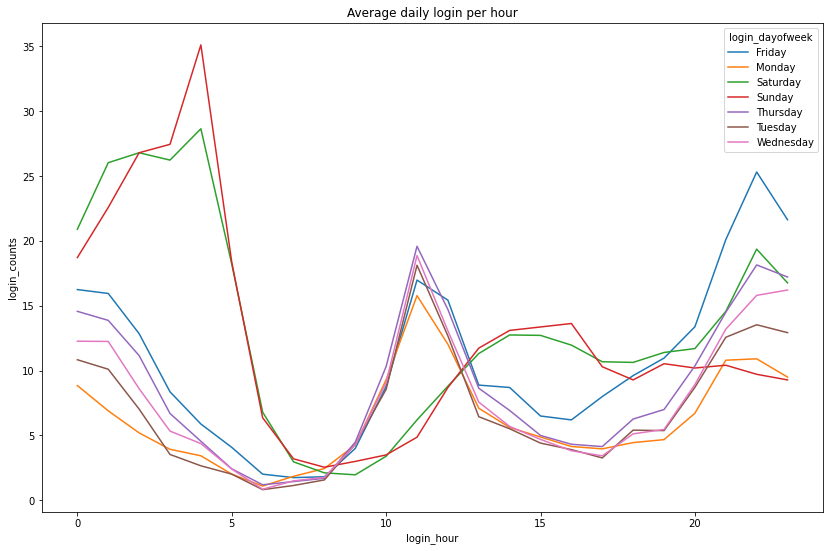

In [ ]:
df_tot  = df.groupby(['login_hour', 'login_dayofweek']).mean().reset_index()

fig, axes = plt.subplots(figsize=(14,9))
ax =sns.lineplot(x='login_hour', y='login_counts', hue='login_dayofweek', data=df_tot)
ax.set_title('Average daily login per hour')
plt.show()

Observe that 
* Weekends logins trends are typically different from weekdays
* average number of logins are highest betweebn 12midnight to 4am on weekends

We can further predict following months using fbprophet but that's not within our problem scope

#**PART TWO: Experiment and metrics design**

**Given:** 
****
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.<br>
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
****

1. **Metrics of success:** <br>
A key measure of success of this experiment in encourging drivers partners to serve both cities is th *daily average driver revenue* (could also be mileage) pre and post toll ridership over a period.
<br> Reason being that driver partners primary goal is revenue ireespective of toll or not. It's says drivers ae exlusive to each city due to a toll cost. However, if there is a toll reimburrsement, the driver attitude might change towards working across cities. (Mileage across toll might be an issue)

2. a. **How to Implement Experiment**<br>
Track a number of drivers revenue(say 80% of active driver not too far from next city) among other features for a specific period(say 3 months). Next we annouce a promo period of 3 months where all tolls will be reimbursed. We would attemt as much to keep other features constant so we can be sure we testing for just our target feature.We should also choose the sam e months across the years. (Jan, Feb, Mar of 2020,2021) to keep weather feature constant. 

b. **What statistical test to use?** <br>
The Null Hypothesis is that the mean between the daily avereage means of riders/org revenue is of the two samples is zero.

Given above, the appropraite statistival test could be t-test or z-test. Given, each group are independent and Normally distributed


c. **Interpretation of result**
We would obtain a t-value /p-value from our test, and check if it falls in d acceptance or rejection region/significance level(where p-value < alpha = 0.05). GIven p-value is so small and less than alpha, we reject the null hypothesis in favor of the alternative hypthesis.
Then we say our test is not significant and thus reh=ject Null hypothesis

<br>


#**PART THREE**

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

**To Do**
****
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).


In [ ]:
#Import and observe data
df2 = pd.read_json('ultimate_data_challenge.json')
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


**Data Wranggling and EDA**

In [ ]:
#let's check our data shape and data types
print(df2.shape)
print(df2.dtypes)

(50000, 12)
city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object


In [ ]:
#convert dates to its workable dtypes
df2['signup_date'] = pd.to_datetime(df2['signup_date'])
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [ ]:
#lets define user retention given that we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
# retained implies 1, otherwise 0
from datetime import datetime, timedelta

#in days
df2['active_range'] = df2['last_trip_date'].dt.date - df2['signup_date'].dt.date
df2['retention'] =[int(i) for i in df2.active_range.dt.days >= 30]

In [ ]:
#check for null values 
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_range                 0
retention                    0
dtype: int64

In [ ]:
df2.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_range,retention
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,1
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,1


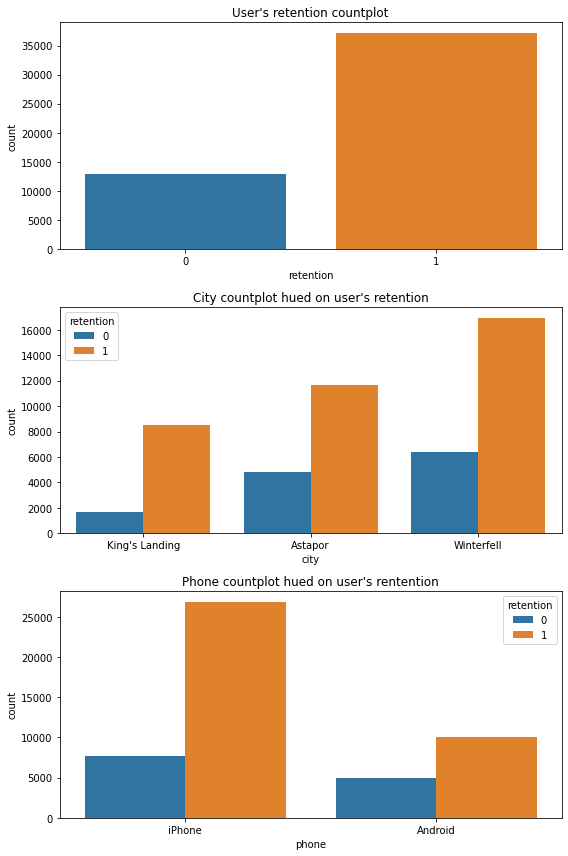

In [ ]:
#let's observe the distribution of each categorical varibles
fig, axs = plt.subplots(3, figsize=(8,12))

axs[0].set_title("User's retention countplot")
sns.countplot(x='retention', data=df2, ax=axs[0])

axs[1].set_title("City countplot hued on user's retention")
sns.countplot(x='city', data=df2, ax=axs[1], hue='retention')

axs[2].set_title("Phone countplot hued on user's rentention")
sns.countplot(x='phone', data=df2, ax=axs[2], hue='retention')

plt.tight_layout()

##**Data processing and modelling**

In [ ]:
#drop datetime cols
df_f = df2.drop(['signup_date', 'last_trip_date', 'active_range'], axis=1)

# dummy  variables for 'city' and 'phone' cols
df_f = pd.get_dummies(data=df_f, columns=['city', 'phone'])

In [ ]:
#observe avg_rating_by_driver 
df_f.avg_rating_by_driver.value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

In [ ]:
#Check for dups
df_f.duplicated().sum()

831

In [ ]:
#For simplicity sake let's drop all dups and null values
df_f= df_f.drop_duplicates().dropna()
print('final df shape is :', df_f.shape)

final df shape is : (41200, 14)


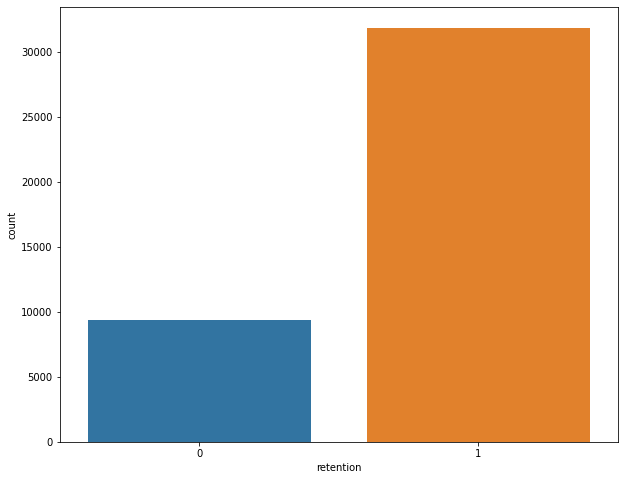

In [ ]:
#Checkout dstribution of retention
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data= df_f, x='retention', ax=ax)
#ax.bar_label(ax.containers[0])

In [ ]:
#Split target and indpendent features to its train and test datasets
y = df_f.retention
X =  df_f.drop('retention', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

In [ ]:
#Import an ensemble model and train 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Check for training and test score and predict
print('Training Score is : ', rf.score(X_train, y_train))
print('Testing Score is : ', rf.score(X_test, y_test))

rf_predict = rf.predict(X_test)

Training Score is :  0.9989597780859917
Testing Score is :  0.8953883495145631


In [ ]:
#evaluate using accuracy, fi score and recall

from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

print(classification_report(y_test, rf_predict, labels=[0, 1]))

print(recall_score(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2804
           1       0.93      0.94      0.93      9556

    accuracy                           0.90     12360
   macro avg       0.86      0.84      0.85     12360
weighted avg       0.89      0.90      0.89     12360

0.9407701967350356


In [ ]:
#Lets observe features with biggest effect 
feats = {}
for i, j in zip(X_train.columns, rf.feature_importances_):
  feats[i] = j

importance = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini_importance'})
importance.sort_values(by='Gini_importance', ascending= False)


,Gini_importance
trips_in_first_30_days,0.284076
avg_dist,0.225535
weekday_pct,0.170557
avg_rating_by_driver,0.111729
avg_rating_of_driver,0.061288
surge_pct,0.055598
avg_surge,0.035561
ultimate_black_user,0.015649
city_King's Landing,0.012160
phone_iPhone,0.007393


**Take Away:**
****
* The biggest predictors to users retention is user's adoption, trips in the first 30days. Thus, Ultimate should lure users using incentives to max-out rides within the first 30days.

* The next big predictor is the avg_dist: the average distance in miles per trip taken in the first 30 days after signup. Thus, Ultimate should ensure shortest distance by levraging drivers locations to users.

* Other strong predictors to retention are: weekday_pct and driver and users ratings. Ultimate should strategically target routinal worker routes during weekdays and keep great drivers and users based off avg_ratings using incentives.

* Other not so important predictors are phone type, city etc. Ultimate could careless about those features to retention.

